In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

task = pd.read_csv('bestsellers.csv')

In [4]:
print(task.head)

<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

In [5]:
row , col = task.shape

print(row,col)

550 7


In [6]:
print('Книга зберігає дані  550 книг')

Книга зберігає дані  550 книг


In [7]:
task.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [12]:
missed = task.isna().sum()
print(missed)



name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
print('Пропусків у змінних немає')

In [14]:
uniqe = task['genre'].unique()

print(uniqe)


['Non Fiction' 'Fiction']


In [15]:
print(f'Унікальні значення : {uniqe}')


Унікальні значення : ['Non Fiction' 'Fiction']


<Axes: ylabel='Frequency'>

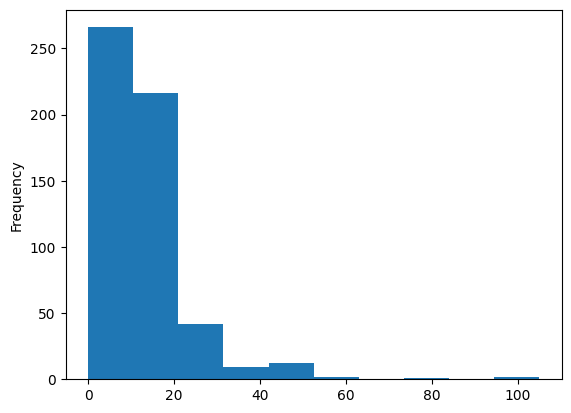

In [22]:
task['price'].plot(kind='hist')

In [27]:
maxx = task['price'].max()
minn = task['price'].min()
median = task['price'].median()
mean = task['price'].mean()

print(f'Максимальна - {maxx}, Мінімальна - {minn} , Середня - {mean} , Медіана - {median} ')

Максимальна - 105, Мінімальна - 0 , Середня - 13.1 , Медіана - 11.0 


In [30]:
rait = task['user_rating'].max()
print(f'Найвищий рейтинг - {rait}')

Найвищий рейтинг - 4.9


In [32]:
count = task['user_rating'].apply(lambda x: x == rait).sum()
print(f'Стільки книг мають максимальний рейтинг - {count}')

Стільки книг мають максимальний рейтинг - 52


In [36]:
rew = task['reviews'].max()
target_rewie = rew

filtered_row = task[task['reviews'] == target_rewie]


target_name = filtered_row['name'].values[0]
print(f'Максимальна кількість відгуків - {rew}, у книги - {target_name}')

Максимальна кількість відгуків - 87841, у книги - Where the Crawdads Sing


In [47]:
sorted_df = task[task['year'] == 2015].sort_values(by='user_rating', ascending=False)

top_50_2015 = sorted_df.head(50)

new_data = pd.concat([top_50_2015], ignore_index=True)

maxx = new_data['price'].max()
print(f'З тих книг що потрапили до топ 50 2015 року , найдорожча - {maxx}')




З тих книг що потрапили до топ 50 2015 року , найдорожча - 46


In [58]:
sorted_data = task[task['year'] == 2010].sort_values(by='user_rating', ascending=False)

top_50_2010 = sorted_df.head(50)

new_date = pd.concat([top_50_2010], ignore_index=True)

value = new_date['genre'].value_counts()
print(value)

print(f'Кількість книг з жанром "Fiction" , що потрапила у топ 50 2010 року - {value}')





""""Прохання пояснити як це завдання робити , бо щось не до кінця зрозумів"""

genre
Non Fiction    33
Fiction        17
Name: count, dtype: int64
Кількість книг з жанром "Fiction" , що потрапила у топ 50 2010 року - genre
Non Fiction    33
Fiction        17
Name: count, dtype: int64


In [59]:
filtered_books = task[task['user_rating'] == 4.9]
filtered_books = filtered_books[filtered_books['year'].isin([2010, 2011])]


count_books = len(filtered_books)

print(count_books)

1


In [61]:
filtered_books = task[(task['year'] == 2015) & (task['price'] < 8)]


sorted_books = filtered_books.sort_values(by='price')
print(sorted_books)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [62]:
print('Остання відсортована книга -  Old School (Diary of a Wimpy Kid #10)')

Остання відсортована книга -  Old School (Diary of a Wimpy Kid #10)


In [63]:
result = task.groupby('genre')['price'].agg(min_price='min', max_price='max')

print(result)

print('Максимальна ціна жанру fiction - 82')
print('Мінімальна ціна жанру fiction - 0 ')
print('Максимальна ціна жанру Non fiction - 105')
print('Мінімальна ціна жанру Non fiction - 0')

             min_price  max_price
genre                            
Fiction              0         82
Non Fiction          0        105


In [88]:
result = task.groupby('author').agg(
    book_count=('name', 'count'),
    
).reset_index()

new_dato = pd.concat([result],ignore_index=True)

print(new_dato)


                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [74]:
row , col = new_dato.shape
print(row,col)



248 3


In [75]:
author_counts = task['author'].value_counts()


most_prolific_author = author_counts.idxmax()

print(most_prolific_author)


Jeff Kinney


In [76]:
most_prolific_author = author_counts.idxmax()

book_count = author_counts[most_prolific_author]

print(book_count)

12


In [93]:
result = task.groupby('author')['user_rating'].agg(avg_rating='mean')

print(result)

                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000

[248 rows x 1 columns]


In [98]:
average_ratings = result.groupby('author')['avg_rating'].mean()


min_avg_rating_author, min_avg_rating = average_ratings.idxmin(), average_ratings.min()

print(min_avg_rating_author, min_avg_rating)


Donna Tartt 3.9


In [100]:
final = pd.concat([new_dato , result], axis=1)

final

,author,book_count,avg_rating
0,Abraham Verghese,2.0,NaN
1,Adam Gasiewski,1.0,NaN
2,Adam Mansbach,1.0,NaN
3,Adir Levy,1.0,NaN
4,Admiral William H. McRaven,1.0,NaN
...,...,...,...
Walter Isaacson,NaN,NaN,4.566667
William Davis,NaN,NaN,4.400000
William P. Young,NaN,NaN,4.600000
Wizards RPG Team,NaN,NaN,4.800000


In [105]:
sorted_final = final.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])

print(sorted_final)

                                           author  book_count  avg_rating
1                                  Adam Gasiewski         1.0         NaN
2                                   Adam Mansbach         1.0         NaN
3                                       Adir Levy         1.0         NaN
4                      Admiral William H. McRaven         1.0         NaN
5                     Adult Coloring Book Designs         1.0         NaN
...                                           ...         ...         ...
Patrick Thorpe                                NaN         NaN         4.9
Pete Souza                                    NaN         NaN         4.9
Rush Limbaugh                                 NaN         NaN         4.9
Sarah Young                                   NaN         NaN         4.9
Sherri Duskey Rinker                          NaN         NaN         4.9

[496 rows x 3 columns]


In [ ]:
print('Перший автор у списку - Adam Gasiewski')

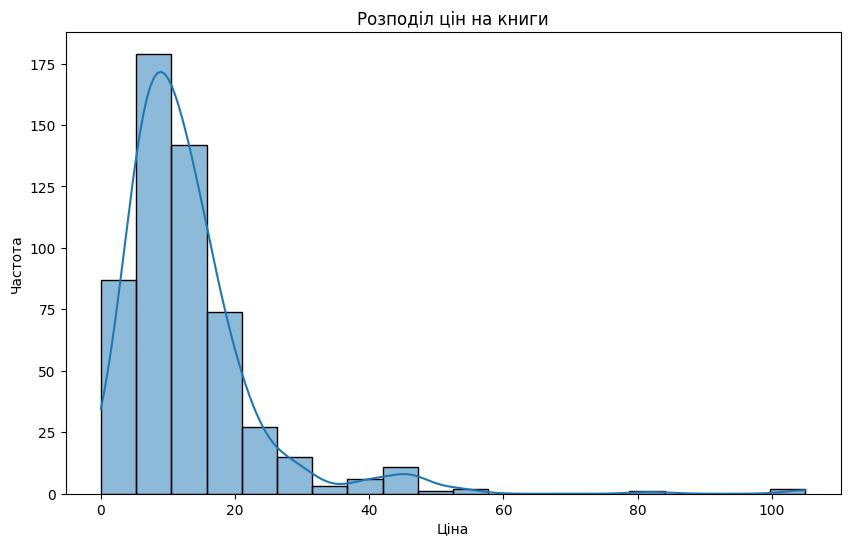

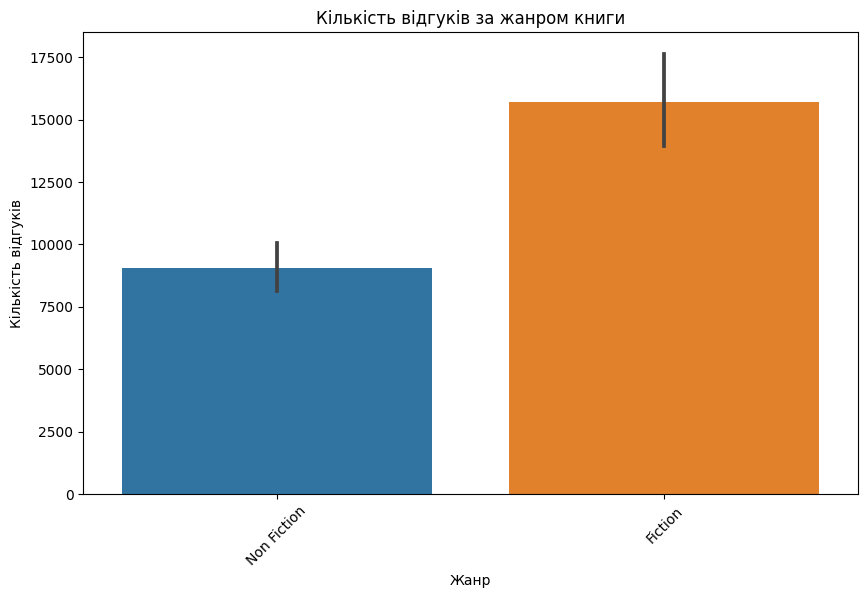

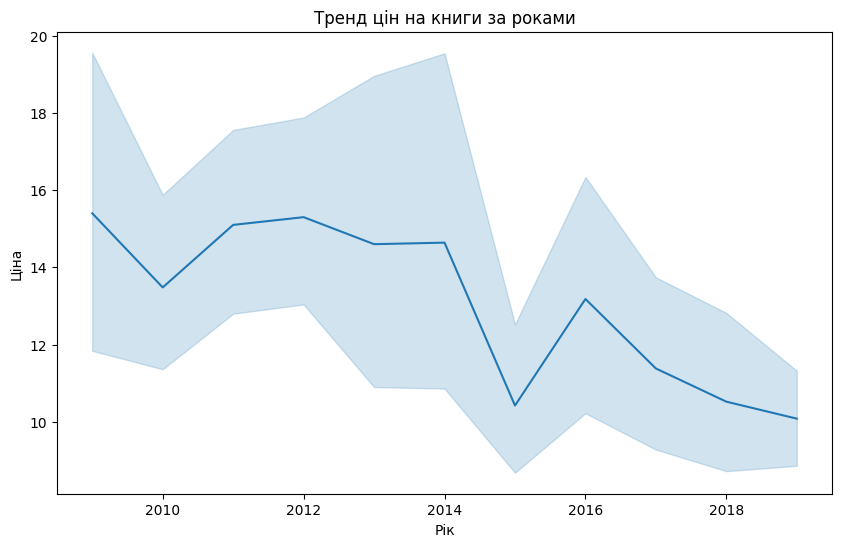

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=task, x='Price', bins=20, kde=True)
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін на книги')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=task, x='Genre', y='Reviews')
plt.xlabel('Жанр')
plt.ylabel('Кількість відгуків')
plt.title('Кількість відгуків за жанром книги')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=task, x='Year', y='Price')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.title('Тренд цін на книги за роками')
plt.show()